In [ ]:
from IPython.core.display import display, HTML

display(HTML("<style>#notebook-container {width: 90% !important; }</style>"))
# 마크다운 폰트 
display(HTML("<style>.rendered_html{font-family: 'D2Coding'; font-size: 16pt; line-height: 140%;}</style>"))
# DataFrame 테이블 폰트 
display(HTML("<style>.rendered_html table{font-family: 'D2Coding'; font-size: 16pt; line-height: 140%;}</style>"))
# 출력창 폰트
display(HTML("<style>pre{font-family: 'D2Coding', font-size: 16pt;}.rendered_html>ul>li{margin: 10px}</style>"))
display(HTML("<style>div.output_area>pre, div.output_subarea>pre{font-size: 16pt; !important; line-height: 140%;}</style>"))
# 코드셀 폰트 
display(HTML("<style> .CodeMirror pre {font-family: 'D2Coding'; font-size: 18pt !important; line-height: 140%;}</style>"))

# Decision Tree (Classfication Tree) 실습

- 데이터의 분할 조건을 파악, Root-node가 가장 중요함 
- 불순도를 기반으로 Feature Importance (특성 중요도) 파악 가능 
- White-box 모델이라고도 부름 -> 모델을 통해 설명 가능하다 -> 해석이 쉽다
- 변수 중요도 추출을 위해 활용

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(cancer['data'],
                                                    cancer['target'],
                                                    stratify=cancer['target'],
                                                    random_state=0)
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [7]:
from sklearn.tree import DecisionTreeClassifier

# Overfitting 우려 있음 -> 깊이를 제한해야 한다.
# Alphago의 예시 -> 너무 깊게 탐색하여 runtime error 깊이를 제어하는게 중요함. 
model = DecisionTreeClassifier().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.9300699300699301)

In [8]:
# 깊이를 제어하는 법 
# max_depth = Tree의 깊이를 제어 
model3 = DecisionTreeClassifier(max_depth=3).fit(x_train, y_train)
model3.score(x_train, y_train), model.score(x_test, y_test)

(0.9765258215962441, 0.9300699300699301)

In [9]:
model.feature_importances_

array([0.        , 0.0393304 , 0.        , 0.        , 0.00891967,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01223453, 0.        , 0.        , 0.01751879, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00401385,
       0.00501731, 0.02958161, 0.72534081, 0.03687207, 0.00931787,
       0.        , 0.        , 0.1118531 , 0.        , 0.        ])

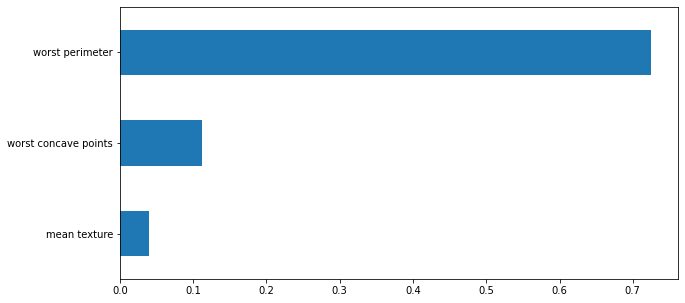

In [12]:
import pandas as pd

# 실제 변수 중요도가 맞는지? 현업과의 communication 을 통해 확인
fi = pd.Series(model.feature_importances_, index=cancer['feature_names'])
fi[fi!=0].sort_values(ascending=True).tail(3).plot(kind='barh', figsize=(10, 5))

In [13]:
fi[fi!=0].sort_values(ascending=False)

worst perimeter            0.725341
worst concave points       0.111853
mean texture               0.039330
worst area                 0.036872
worst texture              0.029582
area error                 0.017519
radius error               0.012235
worst smoothness           0.009318
mean smoothness            0.008920
worst radius               0.005017
fractal dimension error    0.004014
dtype: float64

In [14]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(max_depth=3).fit(x_train, y_train)
model3.score(x_train, y_train), model3.score(x_test, y_test)

(0.9765258215962441, 0.9300699300699301)

In [15]:
from sklearn.tree import DecisionTreeClassifier
model5 = DecisionTreeClassifier(max_depth=5).fit(x_train, y_train)
model5.score(x_train, y_train), model5.score(x_test, y_test)

(1.0, 0.916083916083916)

## Decision Tree의 시각화

In [19]:
from sklearn.tree import export_graphviz
export_graphviz(model3, # Tree 모델
                out_file='model3.dot', # 저장할 파일명 
                feature_names=cancer['feature_names'], # 컬럼이름 
                class_names=cancer['target_names'], # y값의 이름 (Label 이름))
                impurity=True, # 불순도 포함 유무 
                filled=True) # 과반 범주 색상으로 표현할지 여부)

In [17]:
!pip install graphviz

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


#### 웹 그래프 비전 활용시 : https://dreampuf.github.io/GraphvizOnline/ 

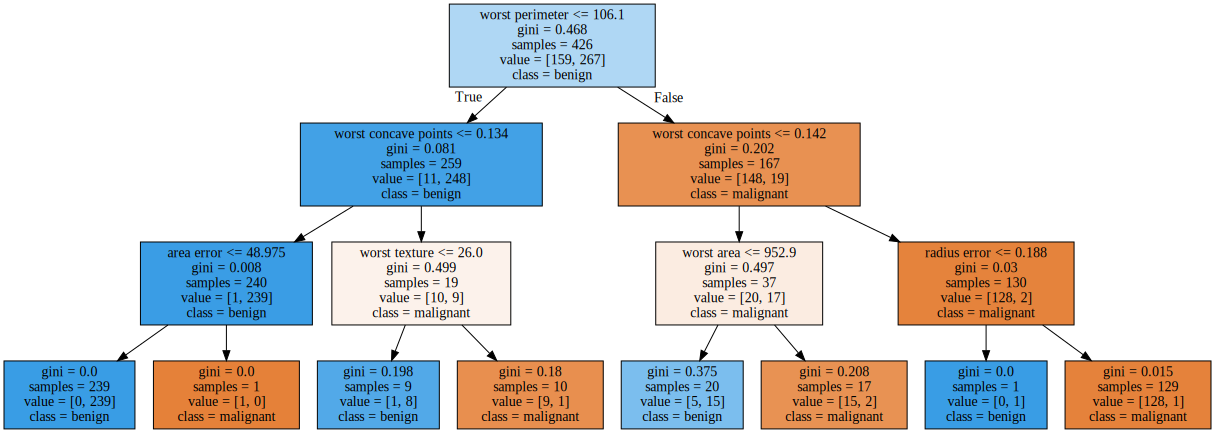

In [20]:
import graphviz
with open('model3.dot') as f:
    data = f.read()
graphviz.Source(data)

In [21]:
export_graphviz(model5,  out_file='model5.dot',
                feature_names=cancer['feature_names'],
                class_names=cancer['target_names'], impurity=True, filled=True)

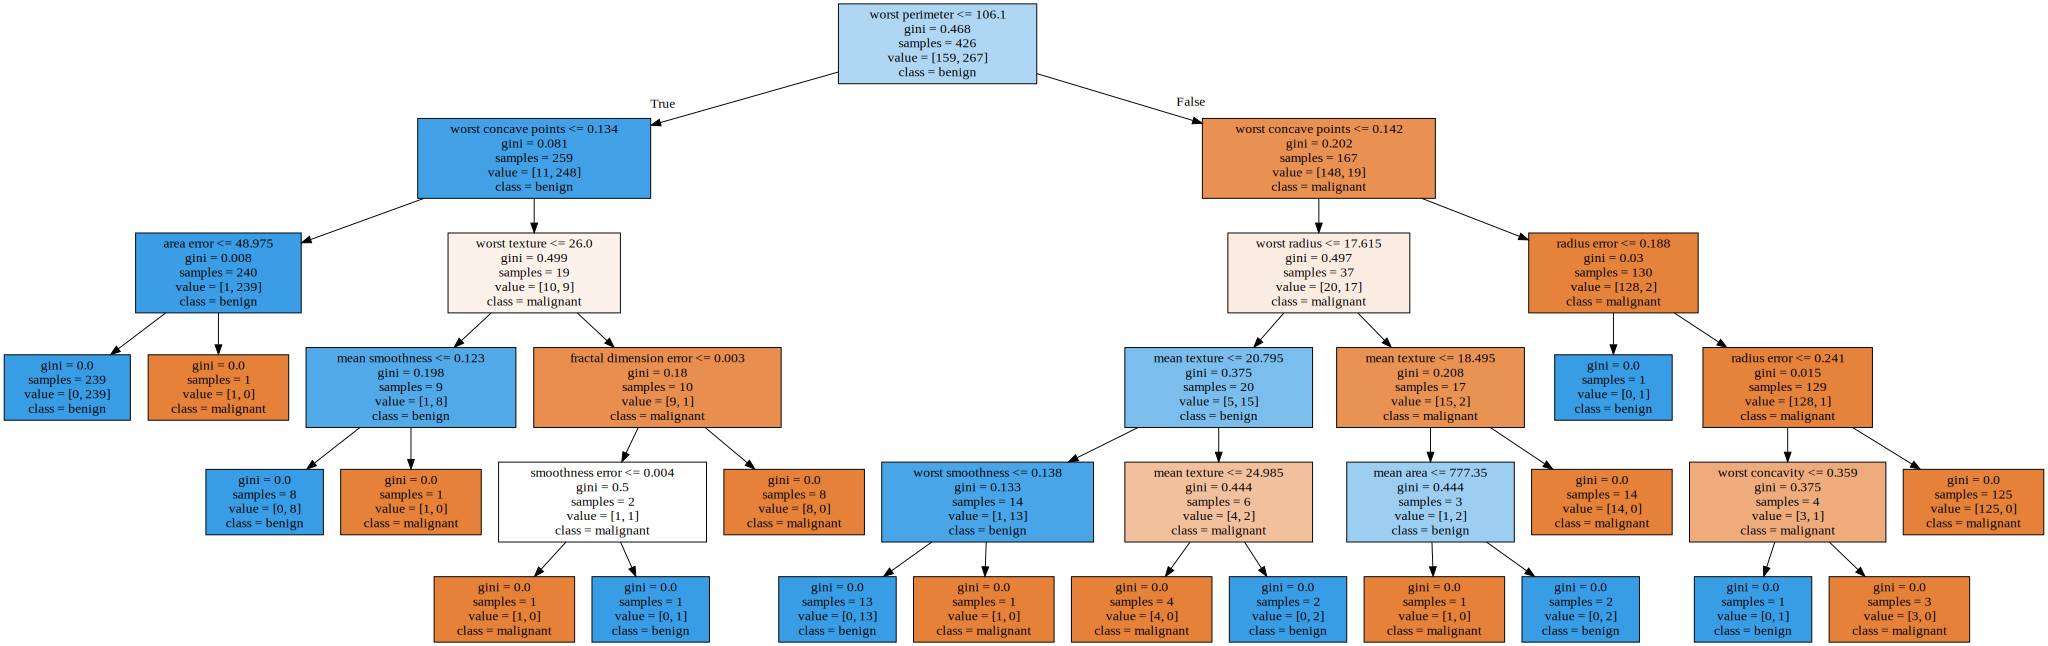

In [22]:
with open('model5.dot') as f:
    data = f.read()
graphviz.Source(data)

# Decision Tree (Regression Tree)

In [23]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# 보스턴 집값 데이터 활용
boston = load_boston()

x_train, x_test, y_train, y_test = train_test_split(boston['data'],
                                                    boston['target'],
                                                    random_state=0)

In [25]:
# 회귀모델 
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor().fit(x_train, y_train)
# R2 나옴
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.6632453948492469)

In [26]:
model.feature_importances_

array([5.71896542e-02, 6.34178998e-04, 1.44083537e-02, 4.50021045e-05,
       1.15347246e-02, 2.42656742e-01, 4.77344202e-03, 3.20518722e-02,
       1.56484430e-03, 1.00756296e-02, 3.05881845e-02, 7.14261396e-03,
       5.87334758e-01])

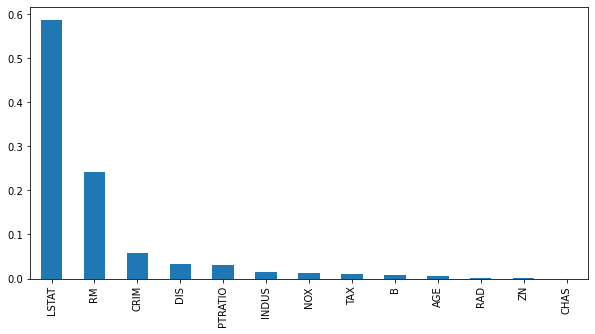

In [27]:
import pandas as pd
fi = pd.Series(model.feature_importances_, index=boston['feature_names'])
fi[fi!=0].sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))

In [28]:
fi[fi!=0].sort_values(ascending=False)

LSTAT      0.587335
RM         0.242657
CRIM       0.057190
DIS        0.032052
PTRATIO    0.030588
INDUS      0.014408
NOX        0.011535
TAX        0.010076
B          0.007143
AGE        0.004773
RAD        0.001565
ZN         0.000634
CHAS       0.000045
dtype: float64

In [29]:
from sklearn.tree import export_graphviz
# 매우 깊은 트리 생성
export_graphviz(model, 
                out_file='model.dot',
                feature_names=boston['feature_names'],
                impurity=True, 
                filled=True)

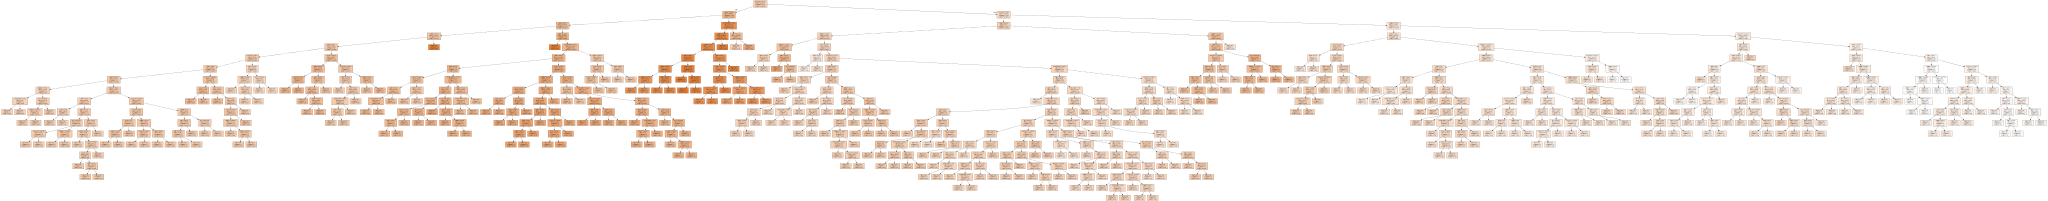

In [30]:
with open('model.dot') as f:
    data = f.read()
graphviz.Source(data)

# Scikit-learn 정리 

# 회귀 
```python
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
```

# 분류

```python
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
```

# 군집화
```python
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
```

# WorkShop 진행